In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 3]

# Task 1

In [2]:
b_img= np.zeros((300,300), dtype=np.uint8)
b_img[100:200,100:200]=255

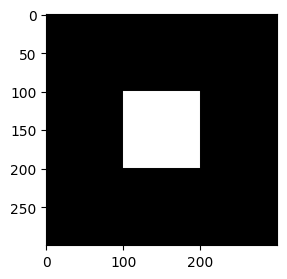

In [3]:
def displayImage(img):
    plt.imshow(img, cmap='gray')
    plt.show()
displayImage(b_img)

# Task 2 

In [4]:
#loading all 3 images
img1=cv2.imread('./Task-assets/concat1.jpg',0)
img2=cv2.imread('./Task-assets/concat2.jpg',0)
img3=cv2.imread('./Task-assets/concat3.jpg',0)

In [5]:
#displaying all 3 images separately at the same time
cv2.imshow("1", img1)
cv2.imshow("2", img2)
cv2.imshow("3", img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

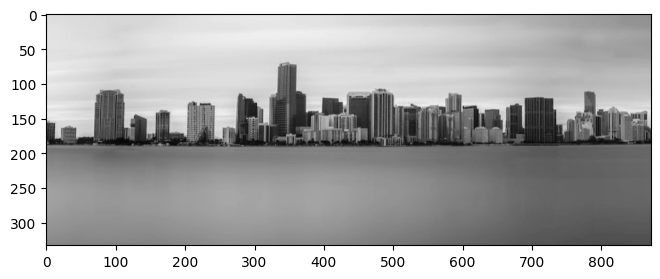

In [6]:
#Concatenating images in order and displaying new image
newimg=np.concatenate((img1,img2,img3),axis=1)
displayImage(newimg)

# Task 3

In [7]:
#defining function for displaying 2 images 
def displayImages(img1,img2):
    fig= plt.figure(figsize=(10,20))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    plt.title("First")
    
    fig.add_subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.title("Second")
    plt.show()

In [8]:
img = cv2.imread('./Task-assets/threshold.jpg') #loading image

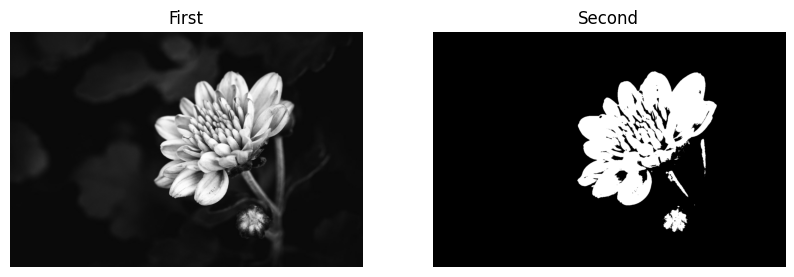

In [9]:
threshold=109 #set threshold value
Timg = np.array(img) #convert image into array
Timg = np.where(Timg >threshold, 255, 0) #converting np array into 0 or 255 
displayImages(img, Timg) #displaying both images

# Task 4

In [10]:
#loading images
ftimg=cv2.imread('./Task-assets/feature1.jpeg',0) 
main_img=cv2.imread('./Task-assets/feature2.jpeg',0)

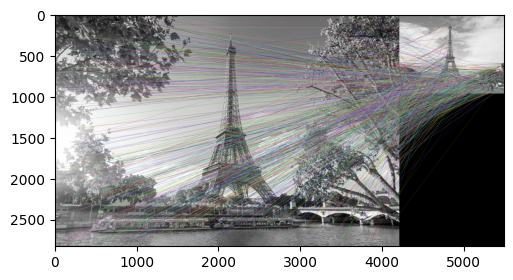

(<matplotlib.image.AxesImage at 0x1db6511ee10>, None)

In [11]:
#Brute-Force Matching with SIFT Descriptors and Ratio Test
sift = cv2.SIFT_create()
keyf1, des1 = sift.detectAndCompute(ftimg,None) #query image
keyf2, des2 = sift.detectAndCompute(main_img,None) #train image

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
 if m.distance < 0.8*n.distance:
     good.append([m])

img3 = cv2.drawMatchesKnn(ftimg,keyf1,main_img,keyf2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

In [3]:
#trying with other images
ftimg=cv2.imread('./Task-assets/featureII.jpg')
main_img=cv2.imread('./Task-assets/featureI.jpg')

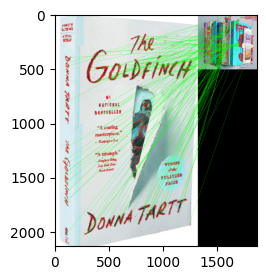

(<matplotlib.image.AxesImage at 0x18880166910>, None)

In [4]:
#FLANN based Matcher
sift = cv2.SIFT_create()
keyf1, des1 = sift.detectAndCompute(ftimg,None) #query image
keyf2, des2 = sift.detectAndCompute(main_img,None) #train image

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
 if m.distance < 0.7*n.distance:
    matchesMask[i]=[1,0]
     
draw_params = dict(matchColor = (0,255,0),
 singlePointColor = (255,0,0),
 matchesMask = matchesMask,
flags = cv2.DrawMatchesFlags_DEFAULT)
img3 = cv2.drawMatchesKnn(ftimg,keyf1,main_img,keyf2,matches,None,**draw_params)
plt.imshow(img3),plt.show()

# Task 5

In [5]:

point1 = None 
point2 = None 
newimg = None
key =0
def rectangleFunction(event,x,y,flags,param):
    global point1, point2, newimg
    if event == cv2.EVENT_LBUTTONDOWN:
        if point1 is None:
            point1 = (x,y)
            print(f"Point 1: {point1}")
        elif point2 is None:
            point2 = (x,y)
            print(f"Point 2: {point2}")
            
            cv2.rectangle(flowers,point1,point2,(0,0,255),6)

#load image
flowers = cv2.imread('./Task-assets/flowers.jpg')
cv2.namedWindow('flowers')
cv2.setMouseCallback('flowers',rectangleFunction)

while(1):
    cv2.imshow('flowers',flowers)
    key = cv2.waitKey(1)
    if key == 27:
        break
cv2.destroyAllWindows()

Point 1: (169, 137)
Point 2: (274, 283)
